In [22]:
import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D ,MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import pickle
import pandas as pd
import numpy as np
import random

In [23]:
#Cloning repo containingthe traffic sign Dataset
!git clone https://bitbucket.org/jadslim/german-traffic-signs

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [24]:
#list dataset contents 
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [25]:
#load the dataset
data = pd.read_csv('german-traffic-signs/signnames.csv')

In [26]:
data

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


In [27]:
#loading pickled dataset
with open ("german-traffic-signs/train.p",mode='rb') as training:
  train = pickle.load(training)
with open ("german-traffic-signs/valid.p",mode='rb') as validation:
  valid = pickle.load(validation)
with open ("german-traffic-signs/test.p",mode='rb') as testing:
  test = pickle.load(testing)

In [28]:
X_train , y_train = train['features'], train['labels']
X_validation , y_validation = valid['features'], valid['labels']
X_test , y_test = test['features'], test['labels']

In [29]:
print(X_train.shape)
print(X_validation.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


image label=34


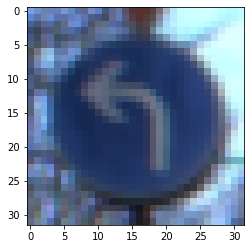

In [30]:
index = np.random.randint(1,len(X_train))
plt.imshow(X_train[index])
print("image label={}".format(y_train[index]))

In [31]:
#Image Pre-processing 
#1. converting to gray scale
#2. Histogram Equalization
#3. Normalization

In [32]:
#shuffle data
from sklearn.utils import shuffle
X_train , y_train  = shuffle(X_train,y_train)

In [33]:
def preprocessing (img):
  #1. converting to gray scale
  img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  #2. Histogram Equalization
  img = cv2.equalizeHist(img)
  #3. Normalization
  img = img/255
  return img

In [34]:
X_train_processed = np.array(list(map(preprocessing,X_train)))
X_validation_processed = np.array(list(map(preprocessing,X_validation)))
X_test_processed = np.array(list(map(preprocessing,X_test)))

In [35]:
X_train_processed = X_train_processed.reshape(34799,32,32,1)
X_validation_processed = X_validation_processed.reshape(4410,32,32,1)
X_test_processed = X_test_processed.reshape(12630,32,32,1)

In [36]:
print(X_train_processed.shape)
print(X_validation_processed.shape)
print(X_test_processed.shape)

(34799, 32, 32, 1)
(4410, 32, 32, 1)
(12630, 32, 32, 1)


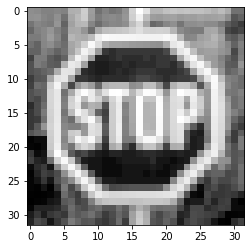

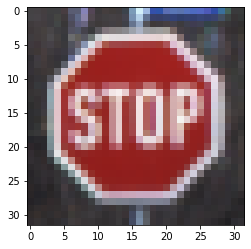

In [37]:
i = random.randint(1,len(X_train))
plt.imshow(X_train_processed[i].squeeze(),cmap='gray')
plt.figure()
plt.imshow(X_train[i].squeeze())

In [38]:
#Build Deep Convolution Neural Network Model

In [39]:
model = Sequential()
#add convolutional layer
#filters, sixe of filters, input_shape,Activation_function
model.add(Conv2D(32,(5,5),activation='relu',input_shape=(32,32,1)))

In [40]:
#pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

In [41]:
#place a dropout layer
model.add(Dropout(0.25))

In [42]:
#add another convolutional layer
model.add(Conv2D(64,(5,5),activation='relu'))

In [43]:
#pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

In [44]:
#flatten the image to 1 dimensional array
model.add(Flatten())

In [45]:
#add a dense layer : amount of nodes,activation
model.add(Dense(256,activation='relu'))

In [46]:
#place a dropout layer
#0.5 drop out rate is recommended, half input nodes will be dropped at each update
model.add(Dropout(0.5))

In [49]:
#defining output layer of our network
model.add(Dense(43,activation='softmax'))

In [51]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)              

In [52]:
#compile our model
model.compile(Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [55]:
history = model.fit(X_train_processed,
    y_train,
    batch_size=500,
    epochs=50,
    verbose=1,
    validation_data=(X_validation_processed,y_validation)

)

Train on 34799 samples, validate on 4410 samples
Epoch 1/50
34799/34799 [==============================] - 8s 244us/step - loss: 3.5557 - accuracy: 0.0628 - val_loss: 3.4562 - val_accuracy: 0.2376
Epoch 2/50
34799/34799 [==============================] - 2s 64us/step - loss: 3.2440 - accuracy: 0.1692 - val_loss: 2.9880 - val_accuracy: 0.3499
Epoch 3/50
34799/34799 [==============================] - 2s 64us/step - loss: 2.6654 - accuracy: 0.3266 - val_loss: 2.3413 - val_accuracy: 0.4404
Epoch 4/50
34799/34799 [==============================] - 2s 63us/step - loss: 2.1732 - accuracy: 0.4203 - val_loss: 1.9032 - val_accuracy: 0.5041
Epoch 5/50
34799/34799 [==============================] - 2s 64us/step - loss: 1.8468 - accuracy: 0.4860 - val_loss: 1.6000 - val_accuracy: 0.5680
Epoch 6/50
34799/34799 [==============================] - 2s 63us/step - loss: 1.6044 - accuracy: 0.5398 - val_loss: 1.3478 - val_accuracy: 0.6424
Epoch 7/50
34799/34799 [==============================] - 2s 63us/st

In [56]:
#Evaluate the performance of the model

In [57]:
score=model.evaluate(X_test_processed,y_test)
print('Test Accuracy',score[1])

12630/12630 [==============================] - 1s 110us/step
Test Accuracy 0.9135391712188721


In [60]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

Text(0.5, 0, 'epochs')

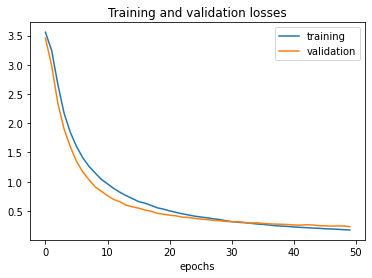

In [59]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and validation losses')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

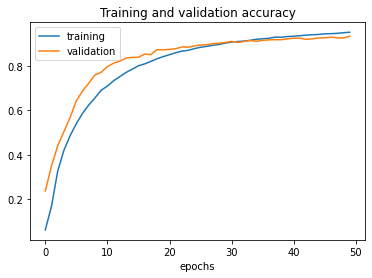

In [62]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epochs')

In [63]:
prediction = model.predict_classes(X_test_processed)
y_true_label = y_test

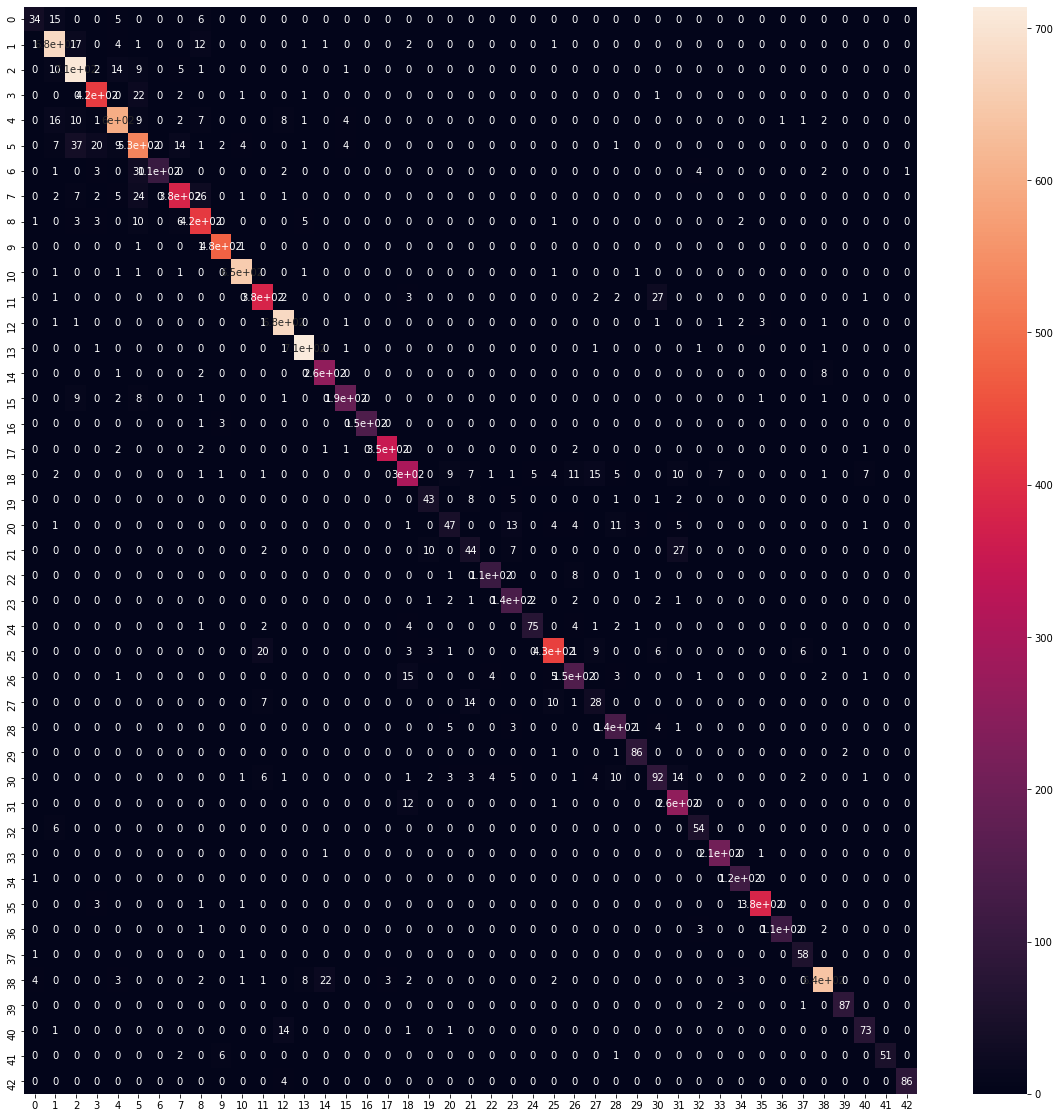

In [64]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_true_label,prediction)
plt.figure(figsize=(20,20))
sns.heatmap(matrix,annot=True)

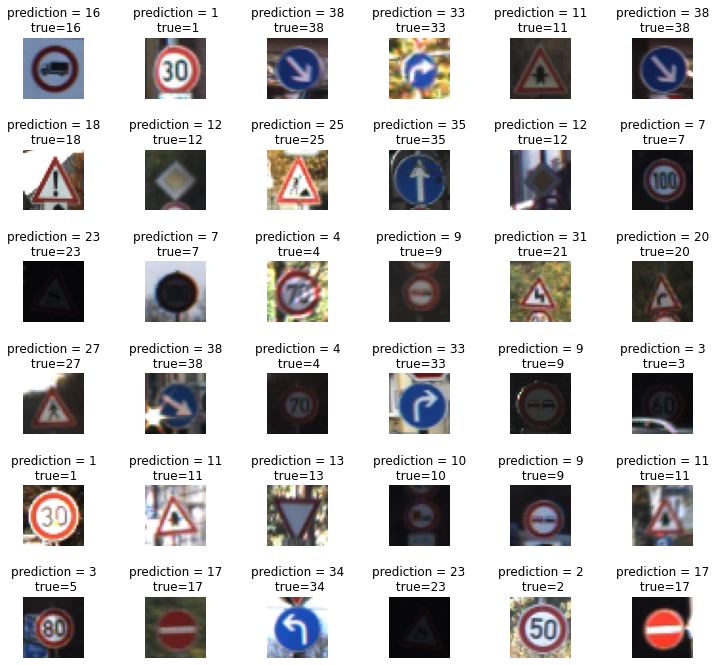

In [66]:
L=6
W=6
fig, axes = plt.subplots(L,W,figsize=(12,12))
axes=axes.ravel()
for i in range(0,L*W):
  axes[i].imshow(X_test[i])
  axes[i].set_title('prediction = {}\n true={}'.format(prediction[i],y_true_label[i]))
  axes[i].axis('off')
plt.subplots_adjust(wspace=1)

In [67]:
model.save('my_model.h5')